In [93]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
from wordcloud import WordCloud, STOPWORDS
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df = pd.read_csv("C:/Users/Prudhvi/Downloads/ted_main.csv")
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [94]:
#I'm just going to reorder the columns in the order.
df = df[['name', 'title', 'description', 'main_speaker',
'speaker_occupation', 'num_speaker', 'duration', 'event',
'film_date', 'published_date', 'comments', 'tags',                          
'languages', 'ratings', 'related_talks', 'url', 'views']]
df.head(30)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,Majora Carter: Greening the ghetto,Greening the ghetto,"In an emotionally charged talk, MacArthur-winn...",Majora Carter,Activist for environmental justice,1,1116,TED2006,1140912000,1151367060,200,"['MacArthur grant', 'activism', 'business', 'c...",35,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,Hans Rosling: The best stats you've ever seen,The best stats you've ever seen,You've never seen data presented like this. Wi...,Hans Rosling,Global health expert; data visionary,1,1190,TED2006,1140566400,1151440680,593,"['Africa', 'Asia', 'Google', 'demo', 'economic...",48,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,Tony Robbins: Why we do what we do,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",Tony Robbins,Life coach; expert in leadership psychology,1,1305,TED2006,1138838400,1151440680,672,"['business', 'culture', 'entertainment', 'goal...",36,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,Julia Sweeney: Letting go of God,Letting go of God,When two young Mormon missionaries knock on Ju...,Julia Sweeney,"Actor, comedian, playwright",1,992,TED2006,1140739200,1152490260,919,"['Christianity', 'God', 'atheism', 'comedy', '...",31,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,Joshua Prince-Ramus: Behind the design of Seat...,Behind the design of Seattle's library,Architect Joshua Prince-Ramus takes the audien...,Joshua Prince-Ramus,Architect,1,1198,TED2006,1140652800,1152490260,46,"['architecture', 'collaboration', 'culture', '...",19,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,Dan Dennett: Let's teach religion -- all relig...,Let's teach religion -- all religion -- in sch...,Philosopher Dan Dennett calls for religion -- ...,Dan Dennett,"Philosopher, cognitive scientist",1,1485,TED2006,1138838400,1153181460,852,"['God', 'TED Brain Trust', 'atheism', 'brain',...",32,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,Rick Warren: A life of purpose,A life of purpose,"Pastor Rick W

In [95]:
#CONVERTING TIMESTAMP TO READABLE TIME AND DATE FORMAT.

import datetime 
df['film_date'] = pd.to_datetime(df['film_date'], unit='s')
df['published_date'] = pd.to_datetime(df['published_date'], unit='s')

#df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y')) 
#df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

In [96]:
#Analysis of top 15 viewed videos.
pop_talks = df[['views','title','published_date','main_speaker']].sort_values(by=['views'],ascending= False)[:15]
print(pop_talks)

         views                                              title  \
0     47227110                        Do schools kill creativity?   
1346  43155405           Your body language may shape who you are   
677   34309432                   How great leaders inspire action   
837   31168150                         The power of vulnerability   
452   22270883             10 things you didn't know about orgasm   
1776  21594632         How to speak so that people want to listen   
201   21190883                               My stroke of insight   
5     20685401                               Why we do what we do   
2114  20475972  This is what happens when you reply to spam email   
1416  19787465  Looks aren't everything. Believe me, I'm a model.   
500   18830983                           The puzzle of motivation   
1163  17629275                            The power of introverts   
1036  16861578                                 How to spot a liar   
2109  16601927  What makes a good 

         views                                              title  \
0     47227110                        Do schools kill creativity?   
1346  43155405           Your body language may shape who you are   
677   34309432                   How great leaders inspire action   
837   31168150                         The power of vulnerability   
452   22270883             10 things you didn't know about orgasm   
1776  21594632         How to speak so that people want to listen   
201   21190883                               My stroke of insight   
5     20685401                               Why we do what we do   
2114  20475972  This is what happens when you reply to spam email   
1416  19787465  Looks aren't everything. Believe me, I'm a model.   
500   18830983                           The puzzle of motivation   
1163  17629275                            The power of introverts   
1036  16861578                                 How to spot a liar   
2109  16601927  What makes a good 

<Axes: xlabel='speakers', ylabel='views'>

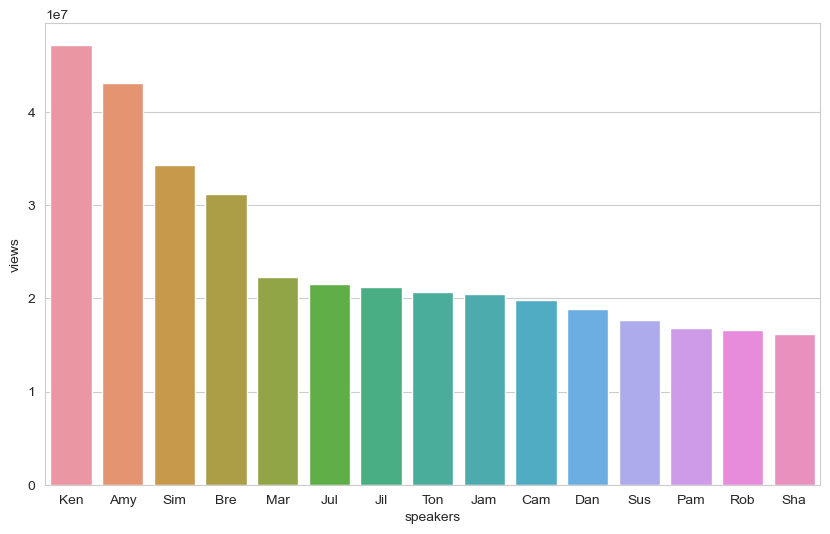

In [97]:
#Analysis of this top 15 popular videos using a bar chart
#1st making abbrivation of names of speakers.
pop_talks['speakers'] = df['main_speaker'].apply(lambda x: x[:3])
print(pop_talks)
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.barplot(x='speakers', y='views', data=pop_talks)

C:\Users\Prudhvi\AppData\Local\Temp\ipykernel_12056\1987356234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['views'])
C:\Users\Prudhvi\AppData\Local\Temp\ipykernel_12056\1987356234.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['views'] < 0.4e7]['views'])


<Axes: xlabel='views', ylabel='Density'>

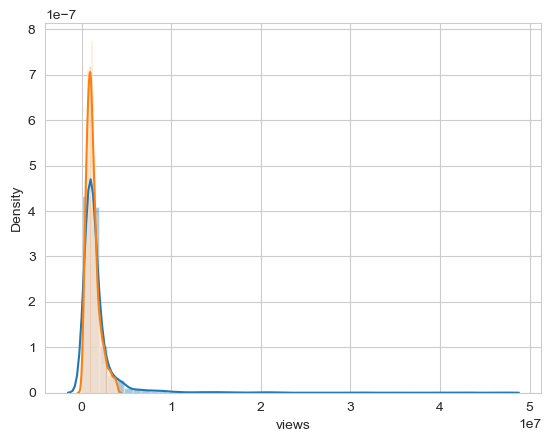

In [98]:
#Analysis 3: let us investigate the summary statistics and the distibution of the views garnered on various TED Talks.
sns.distplot(df['views']) 
sns.distplot(df[df['views'] < 0.4e7]['views'])

In [99]:
#Analysis 4:
pop_talks['views'].describe()

count    1.500000e+01
mean     2.453325e+07
std      9.824637e+06
min      1.620973e+07
25%      1.823013e+07
50%      2.068540e+07
75%      2.671952e+07
max      4.722711e+07
Name: views, dtype: float64

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


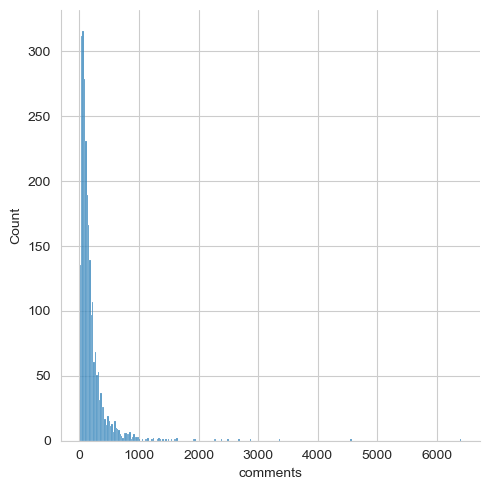

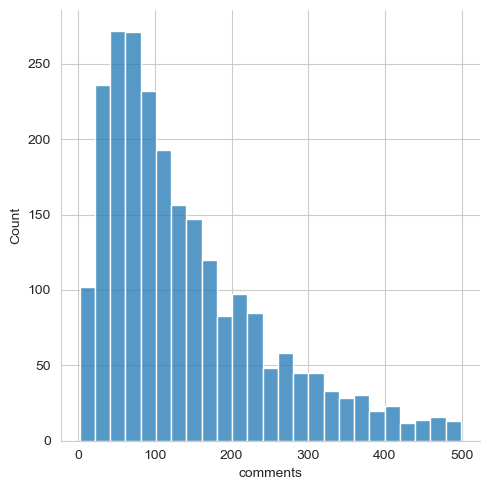

In [100]:
#Analysis 5: Performing textual analysis of comments 
print(df['comments'].describe()) 
sns.displot(df['comments']) 
sns.displot(df[df['comments'] < 500]['comments']) 

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


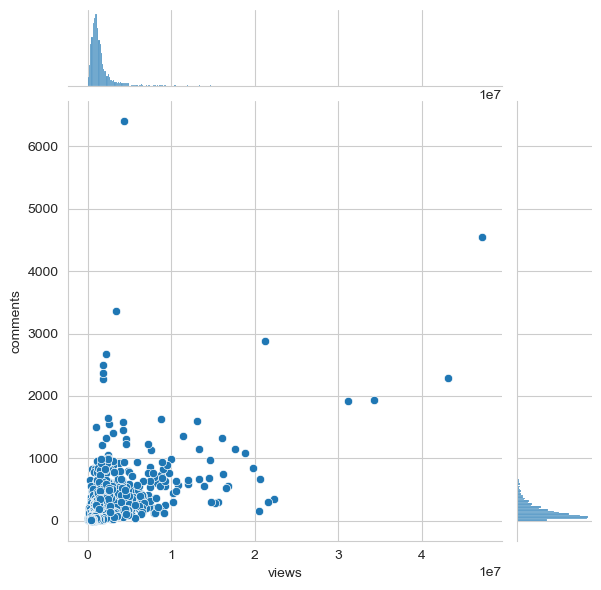

In [101]:
#Analysis 6: if the number of views is correlated with the number of comments. 
#We should think that this is the case as more popular videos tend to have more comments. 
sns.jointplot(x='views', y='comments', data=df) 
df[['views', 'comments']].corr()

In [102]:
#Analysis 7: number of views and comments on the 10 most commented TED Talks of all time 
df[['title', 'main_speaker','views', 'comments']].sort_values('comments', ascending=False).head(10)

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673
954,Taking imagination seriously,Janet Echelman,1832930,2492
840,On reading the Koran,Lesley Hazleton,1847256,2374
1346,Your body language may shape who you are,Amy Cuddy,43155405,2290
661,The danger of science denial,Michael Specter,1838628,2272
677,How great leaders inspire action,Simon Sinek,34309432,1930


In [103]:
#discussion quotient which is simply the ratio of the number of comments to the number of views 
df['dis_quo'] = df['comments']/df['views'] 
df[['title', 'main_speaker','views', 'comments', 'dis_quo', 'film_date']].sort_values('dis_quo', ascending=False).head(10)

,title,main_speaker,views,comments,dis_quo,film_date
744,The case for same-sex marriage,Diane J. Savino,292395,649,0.002220,2009-12-02
803,E-voting without fraud,David Bismark,543551,834,0.001534,2010-07-14
96,Militant atheism,Richard Dawkins,4374792,6404,0.001464,2002-02-02
694,Inside a school for suicide bombers,Sharmeen Obaid-Chinoy,1057238,1502,0.001421,2010-02-10
954,Taking imagination seriously,Janet Echelman,1832930,2492,0.001360,2011-03-03
840,On reading the Koran,Lesley Hazleton,1847256,2374,0.001285,2010-10-10
876,Curating humanity's heritage,Elizabeth Lindsey,439180,555,0.001264,2010-12-08
1787,How do you explain consciousness?,David Chalmers,2162764,2673,0.001236,2014-03-18
661,The danger of science denial,Michael Specter,1838628,2272,0.001236,2010-02-11
561,Dance to change the world,Mallika Sarabhai,481834,595,0.001235,2009-11-04


<Axes: xlabel='month', ylabel='talks'>

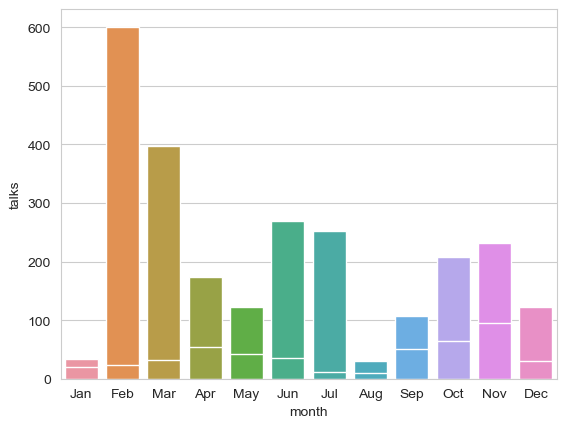

In [104]:
###Analysing TED Talks by the month and the year 
df['month'] = df['film_date'].apply(lambda x: month_order[x.month - 1]) 
month_df = pd.DataFrame(df['month'].value_counts()).reset_index() 
month_df.columns = ['month', 'talks'] 
sns.barplot(x='month', y='talks', data=month_df, order=month_order) 
df_x = df[df['event'].str.contains('TEDx')] 
x_month_df = pd.DataFrame(df_x['month'].value_counts().reset_index()) 
x_month_df.columns = ['month', 'talks'] 
sns.barplot(x='month', y='talks', data=x_month_df, order=month_order)

<Axes: xlabel='day', ylabel='talks'>

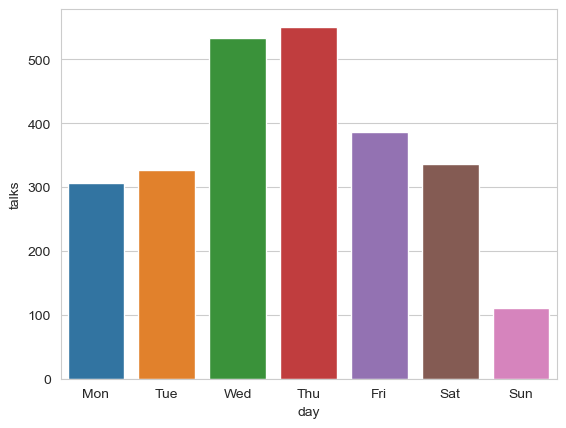

In [105]:
##the most popular days for conducting TED and TEDx conferences.
df['day'] = df['film_date'].dt.day_name().str[0:3]
day_df = pd.DataFrame(df['day'].value_counts()).reset_index()

day_df.columns = ['day', 'talks']
sns.barplot(x='day', y='talks', data=day_df, order=day_order)

C:\Users\Prudhvi\AppData\Local\Temp\ipykernel_12056\767696459.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_year.column = ['year', 'count']
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


    year  count
0   2012    306
1   2011    261
2   2010    257
3   2013    244
4   2016    243
5   2014    240
6   2009    222
7   2015    220
8   2017    197
9   2008    188
10  2007    122
11  2006     50


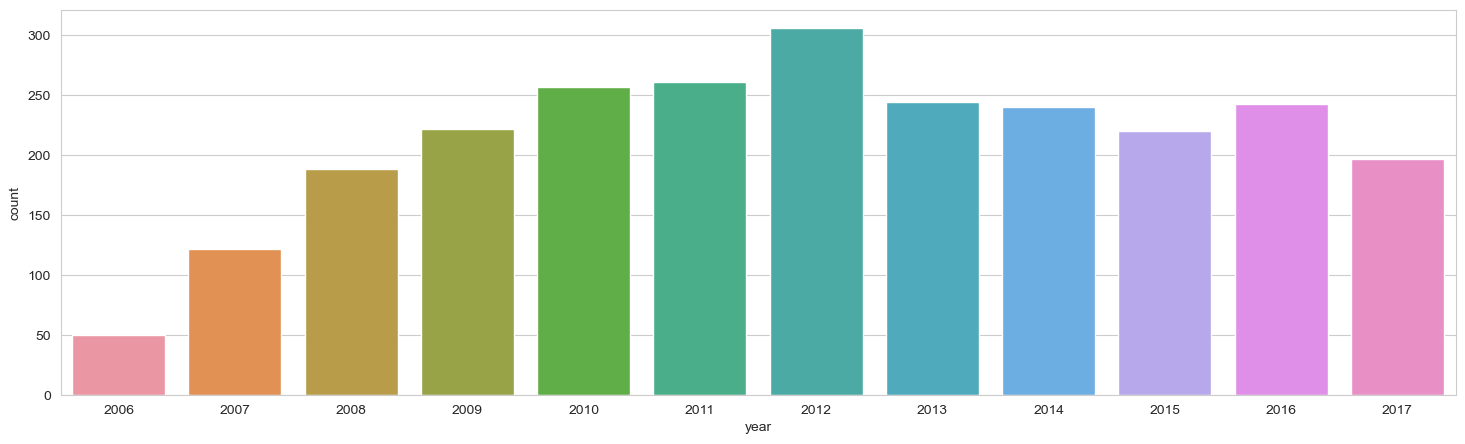

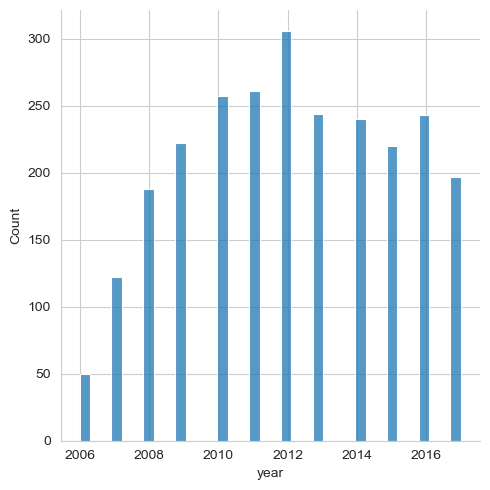

In [106]:
#GROWTH of tedx talks year wise
df['year'] = df['published_date'].apply(lambda x: x.year)
df_year = pd.DataFrame(df['year'].value_counts().reset_index())
df_year.column = ['year', 'count']
print(df_year)
plt.figure(figsize=(18,5))
sns.barplot(x='year', y='count',data=df_year )
sns.displot(df['year'],bins=36)

<Axes: xlabel='year', ylabel='talks'>

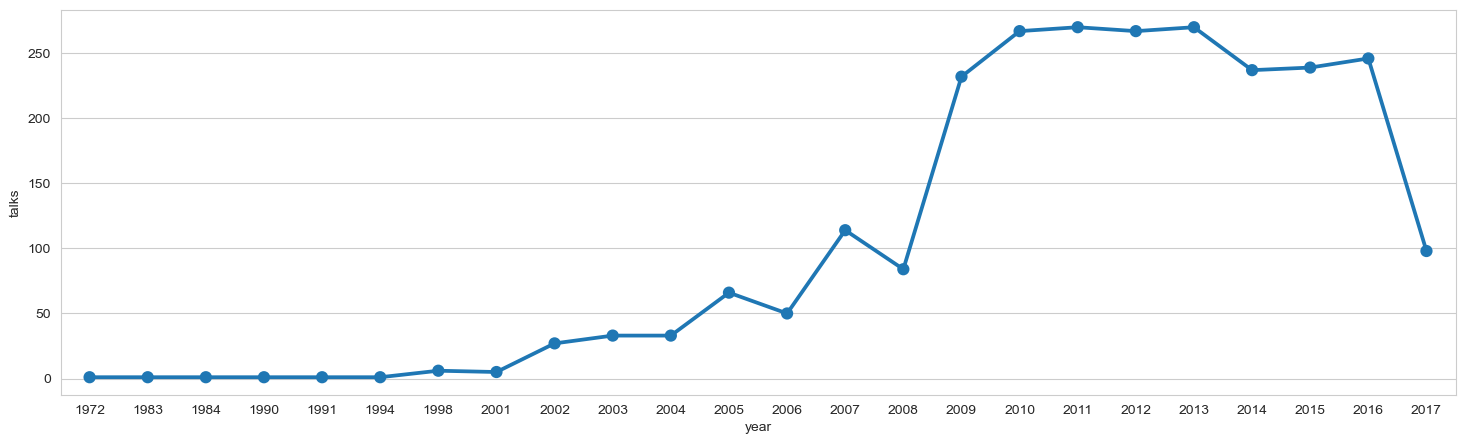

In [107]:
df['year'] = df['film_date'].apply(lambda x: x.year) 
year_df = pd.DataFrame(df['year'].value_counts().reset_index()) 
year_df.columns = ['year', 'talks'] 
plt.figure(figsize=(18,5))
sns.pointplot(x='year', y='talks', data=year_df)

           main_speaker  count
0          Hans Rosling      9
1         Juan Enriquez      7
2         Marco Tempest      6
3                 Rives      6
4            Dan Ariely      5
5  Jacqueline Novogratz      5
6           Clay Shirky      5
7            Bill Gates      5
8   Nicholas Negroponte      5
9       Julian Treasure      5


<Axes: xlabel='speakers', ylabel='counts'>

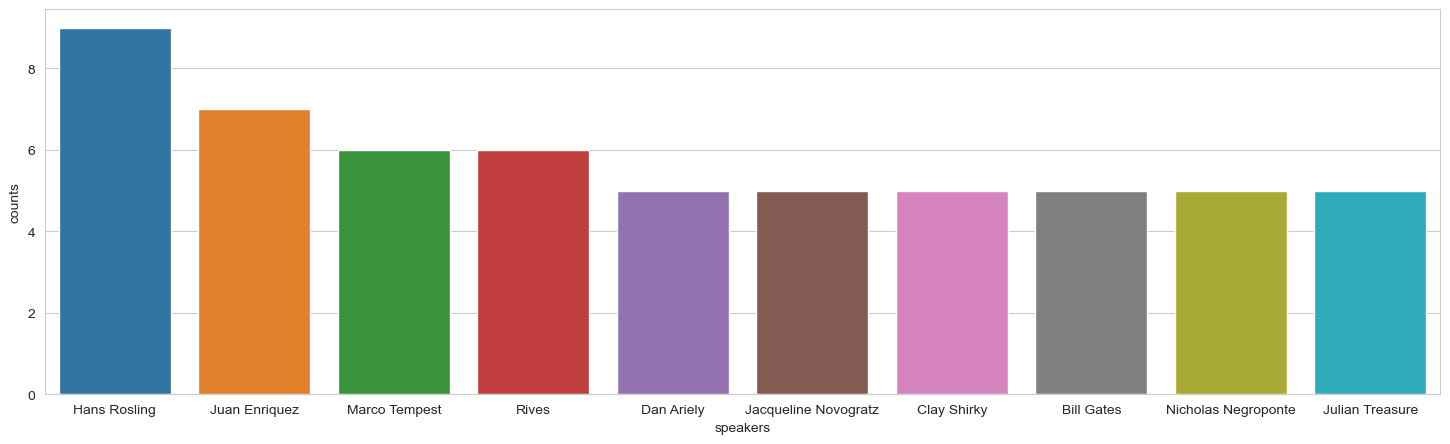

In [108]:
#TED SPEAKERS
# MOST APPEARED TED SPEAKER.
df['speakers'] = df['main_speaker']
df_speaker = df['main_speaker'].value_counts().reset_index()[:10]
print(df_speaker)
df_speaker.columns = ['speakers', 'counts']
plt.figure(figsize=(18,5))
sns.barplot(x='speakers', y= 'counts', data = df_speaker)

<bound method NDFrame.head of          occupations  counts
0             Writer      45
1           Designer      34
2             Artist      34
3         Journalist      33
4       Entrepreneur      31
5          Architect      30
6           Inventor      27
7       Psychologist      26
8             Author      26
9       Photographer      25
10         Filmmaker      21
11         Economist      20
12          Educator      20
13    Neuroscientist      20
14       Philosopher      16
15        Roboticist      16
16         Biologist      15
17         Physicist      14
18          Musician      11
19  Marine biologist      11>


<Axes: xlabel='occupations', ylabel='counts'>

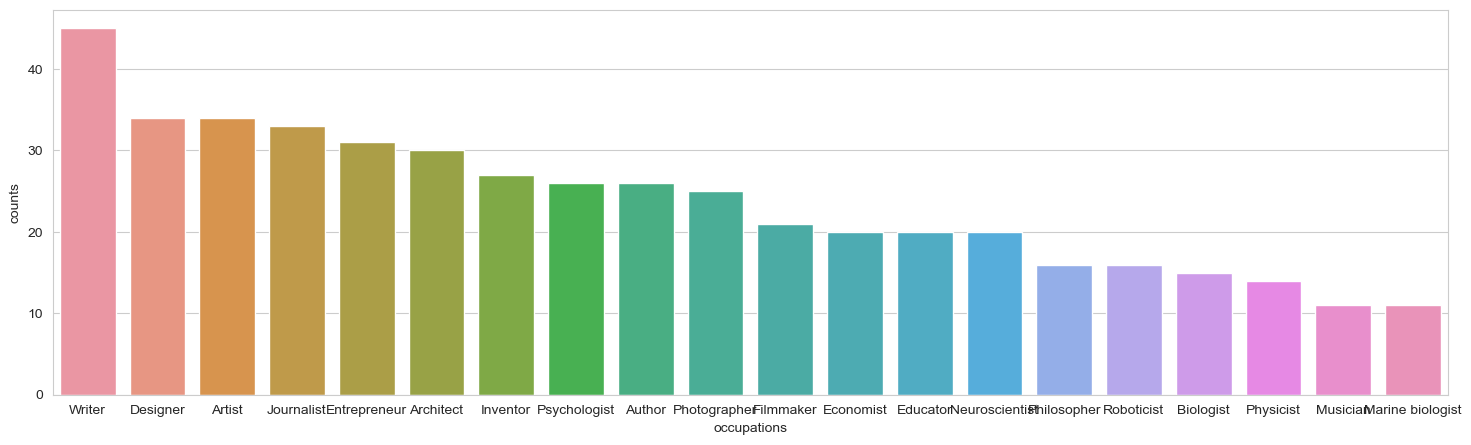

In [109]:
#TED speakers occupation
# MOST popular top 20 TED speaker's occupation.
occupations = []
for i in df['speaker_occupation']:
    if isinstance(i, str):
        occupations.extend(i.split('/'))
from collections import Counter
count = Counter(occupations)
counts = pd.Series(occupations).value_counts()[:20]
edf = pd.DataFrame(counts).reset_index()
edf.rename(columns={'index': 'occupations', 'count': 'counts'},inplace = True)
print(edf.head)
plt.figure(figsize=(18,5))
sns.barplot(x='occupations', y= 'counts', data=edf)

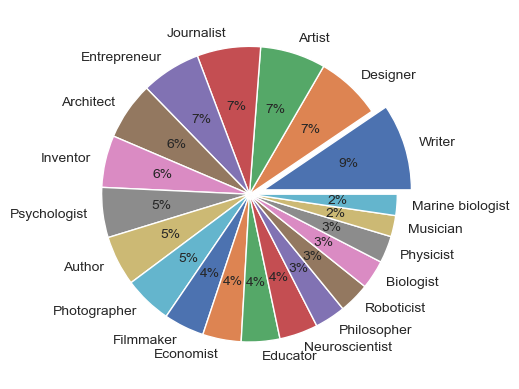

In [110]:
#PIE CHART
explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
palette_color = sns.color_palette('deep') 
plt.pie(edf['counts'], labels=edf['occupations'], colors=palette_color, explode=explode, autopct='%.0f%%')
plt.show()

            speaker_occupation      views
1426                    Writer  133549303
1131              Psychologist   90851398
142            Author/educator   63006281
515               Entrepreneur   61764022
1257       Social psychologist   56813602
781          Leadership expert   48203767
753                 Journalist   47860783
413                   Designer   43294187
924             Neuroscientist   40889730
1408  Vulnerability researcher   39157044


<Axes: xlabel='speaker_occupation', ylabel='views'>

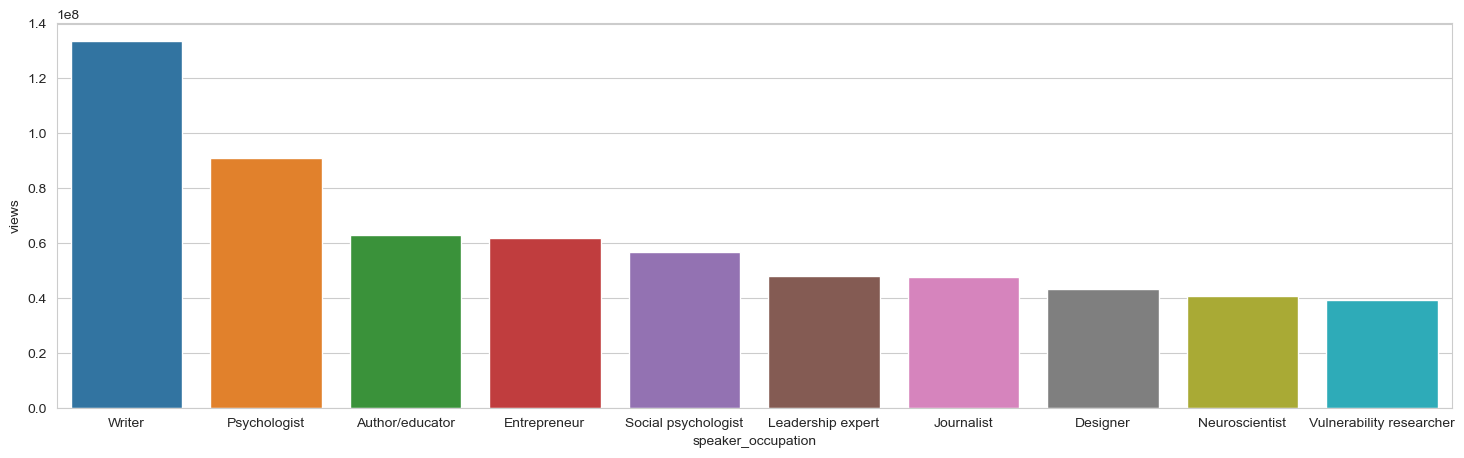

In [111]:
# popular proffesions and views
df_ppv = df[['speaker_occupation','views']] #single square brackets creates series while double create dataframe
df_ppv.sort_values('views')
grouped = df_ppv.groupby(by= 'speaker_occupation').sum().reset_index().sort_values(by='views', ascending=False)[:10]
print(grouped)
plt.figure(figsize=(18,5))
sns.barplot(x='speaker_occupation', y='views', data=grouped)

     speaker_occupation     views
0       Author/educator  47227110
28               Writer   7023562
30         Psychologist  10000702
56               Writer    684519
62           Journalist   2441805
...                 ...       ...
2444       Entrepreneur   1460852
2470     Neuroscientist   1781721
2487       Psychologist   1858990
2523       Entrepreneur    744793
2545         Journalist    450430

[207 rows x 2 columns]


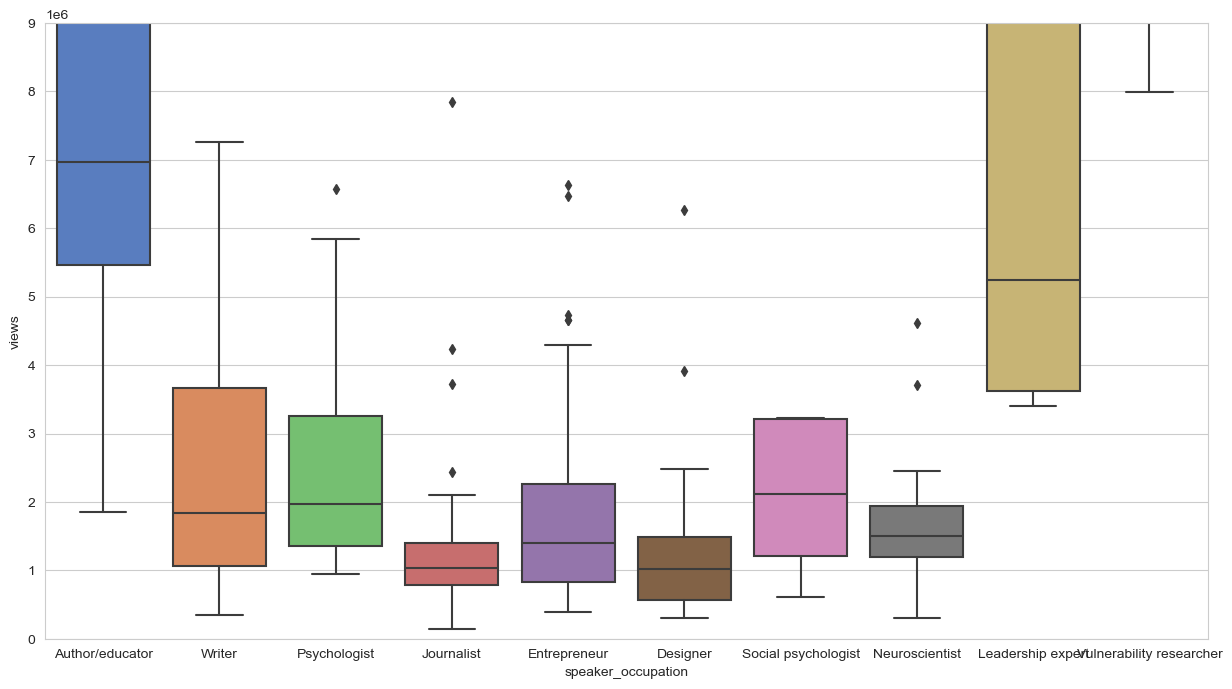

In [112]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))
top_10 = grouped['speaker_occupation'].tolist()
filtered_df_ppv = df_ppv[df_ppv['speaker_occupation'].isin(top_10)]
print(filtered_df_ppv)
sns.boxplot(x='speaker_occupation',y='views',data=filtered_df_ppv,palette="muted",ax=ax)
ax.set_ylim([0, 0.9e7])
plt.show()

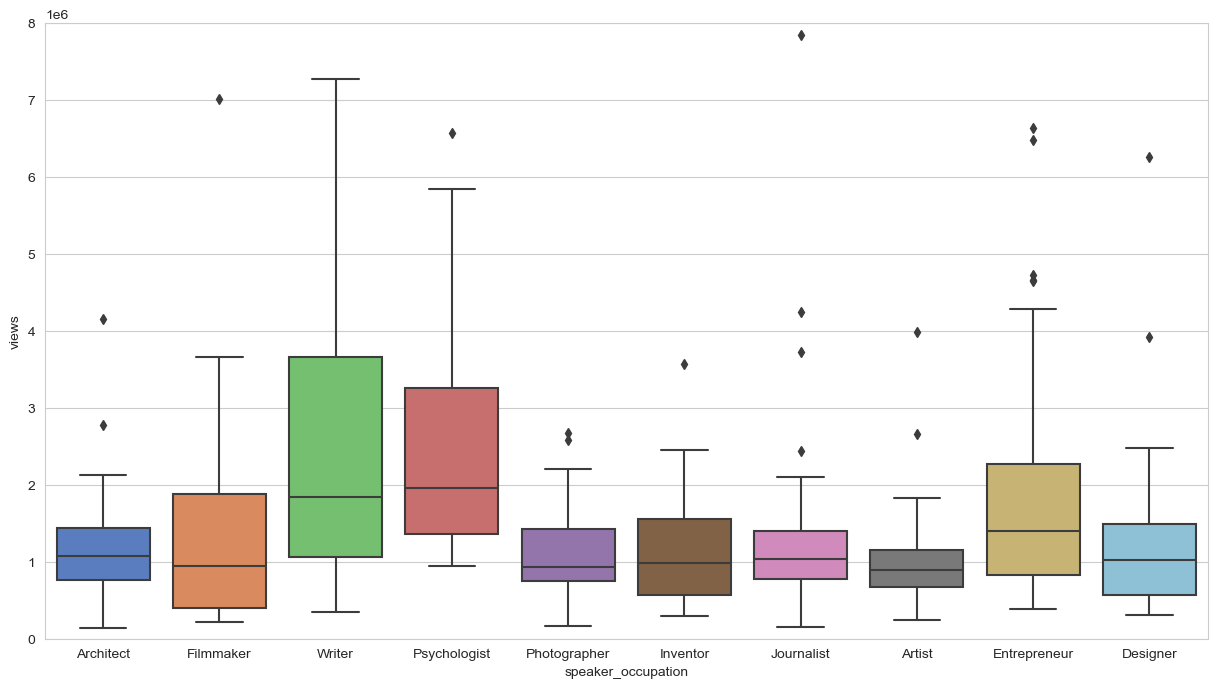

In [113]:
occupation_df = df.groupby('speaker_occupation')['comments'].count().reset_index()
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 8))

# Create a boxplot for the top 10 occupations by appearances
sns.boxplot(
    x='speaker_occupation', 
    y='views', 
    data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], 
    palette="muted", 
    ax=ax
)
ax.set_ylim([0, 8e6])
plt.show()

In [114]:
#talks which had more then one speaker
no_talks = df[['title','num_speaker','main_speaker']].sort_values(by='num_speaker',ascending=False).reset_index()[:20]
no_talks

,index,title,num_speaker,main_speaker
0,2507,A dance to honor Mother Earth,5,Jon Boogz and Lil Buck
1,1543,The interspecies internet? An idea in progress,4,"Diana Reiss, Peter Gabriel, Neil Gershenfeld a..."
2,2334,An interview with the founders of Black Lives ...,4,"Alicia Garza, Patrisse Cullors and Opal Tometi"
3,2421,Political common ground in a polarized United ...,4,"Gretchen Carlson, David Brooks"
4,1971,"The dancer, the singer, the cellist ... and a ...",3,Bill T. Jones
5,796,"""(Nothing But) Flowers"" with string quartet",3,"David Byrne, Ethel + Thomas Dolby"
6,2319,"""Space Oddity""",3,"Amanda Palmer, Jherek Bischoff, Usman Riaz"
7,2215,My journey from Marine to actor,3,Adam Driver
8,1107,Award-winning teenage science in action,3,"Lauren Hodge, Shree Bose + Naomi Shah"
9,1112,The debut of the British Paraorchestra,2,Charles Hazlewood + British Paraorchestra


      languages        main_speaker  \
973          72          Matt Cutts   
606          69        Derek Sivers   
47           66    Richard St. John   
653          65        Derek Sivers   
479          64     Arthur Benjamin   
239          61    Murray Gell-Mann   
0            60        Ken Robinson   
940          59         Terry Moore   
758          58        Derek Sivers   
654          58        Adora Svitak   
692          57        Ken Robinson   
839          57  Arianna Huffington   
469          56    Richard St. John   
785          55       Stacey Kramer   
1253         54         Terry Moore   
898          54      Patricia Ryan    
919          53           Ric Elias   
299          53         Laura Trice   
242          52         Dean Ornish   
837          52         Brené Brown   

                                          title     views  
973               Try something new for 30 days   8838874  
606                   Weird, or just different?   2835976  


count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

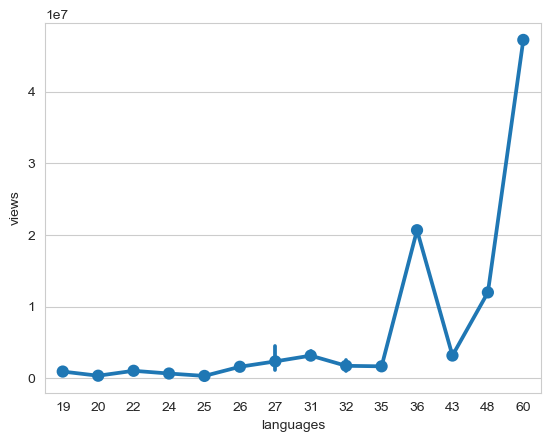

In [115]:
#TED Events analysis for number of languages posted.
lan_df= df[['languages','main_speaker','title','views']]
print(lan_df.sort_values('languages', ascending = False)[:20])
sns.pointplot(x='languages', y='views', data=lan_df[:20])
lan_df['languages'].describe()

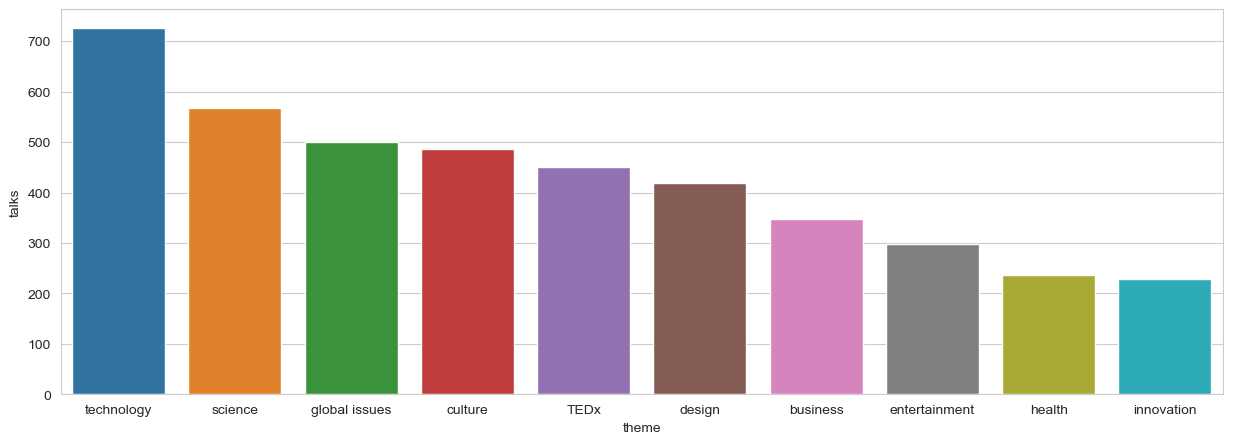

In [116]:
import ast 
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme' 
theme_df = df.drop('tags', axis=1).join(s) 
theme_df.head() 
len(theme_df['theme'].value_counts()) 
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10) 
plt.figure(figsize=(15,5)) 
sns.barplot(x='theme', y='talks', data=pop_themes.head(10)) 
plt.show()


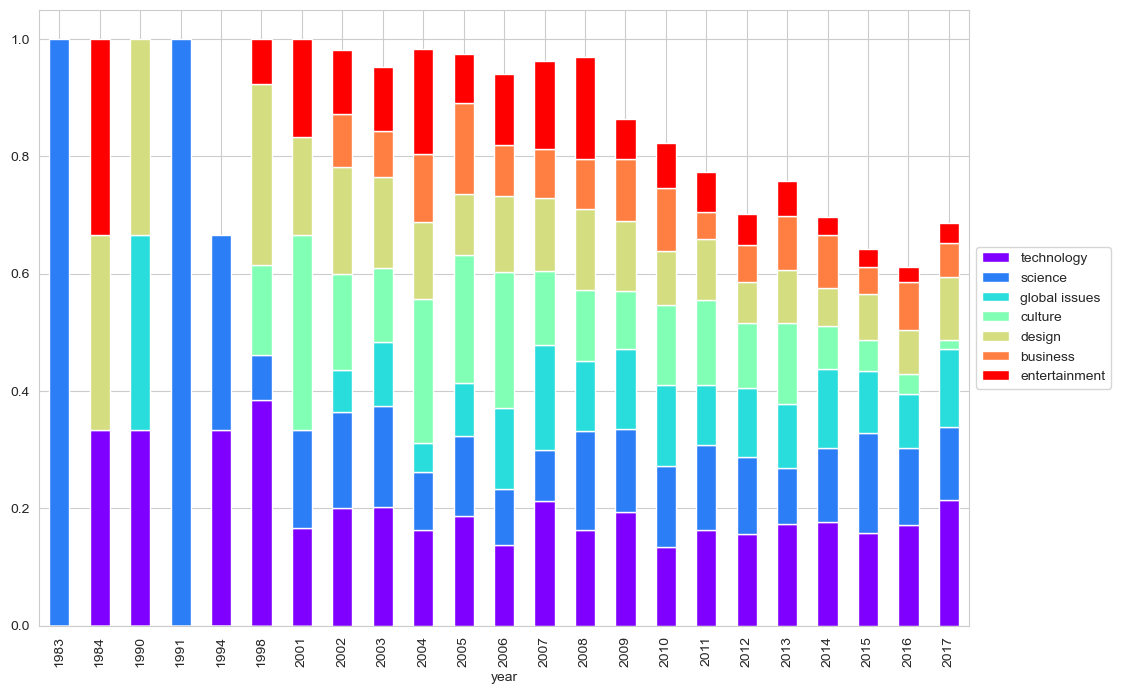

In [117]:
pop_theme_talks = theme_df[theme_df['theme'].isin(pop_themes.head(10)['theme'])]
themes = list(pop_themes.head(8)['theme']) 
themes.remove('TEDx') 
ctab = pd.crosstab([pop_theme_talks['year']], pop_theme_talks['theme']).apply(lambda x: x/x.sum(), axis=1) 
ctab[themes].plot(kind='bar', stacked=True, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show() 

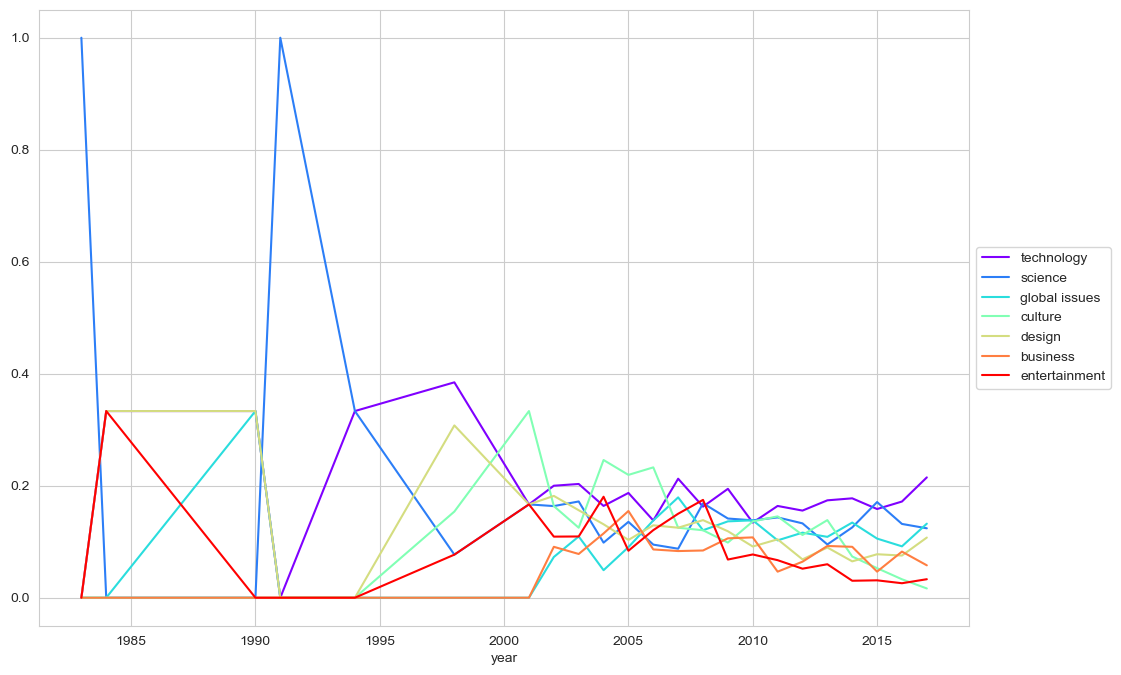

In [118]:
ctab[themes].plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.show() 

(0.0, 4000000.0)

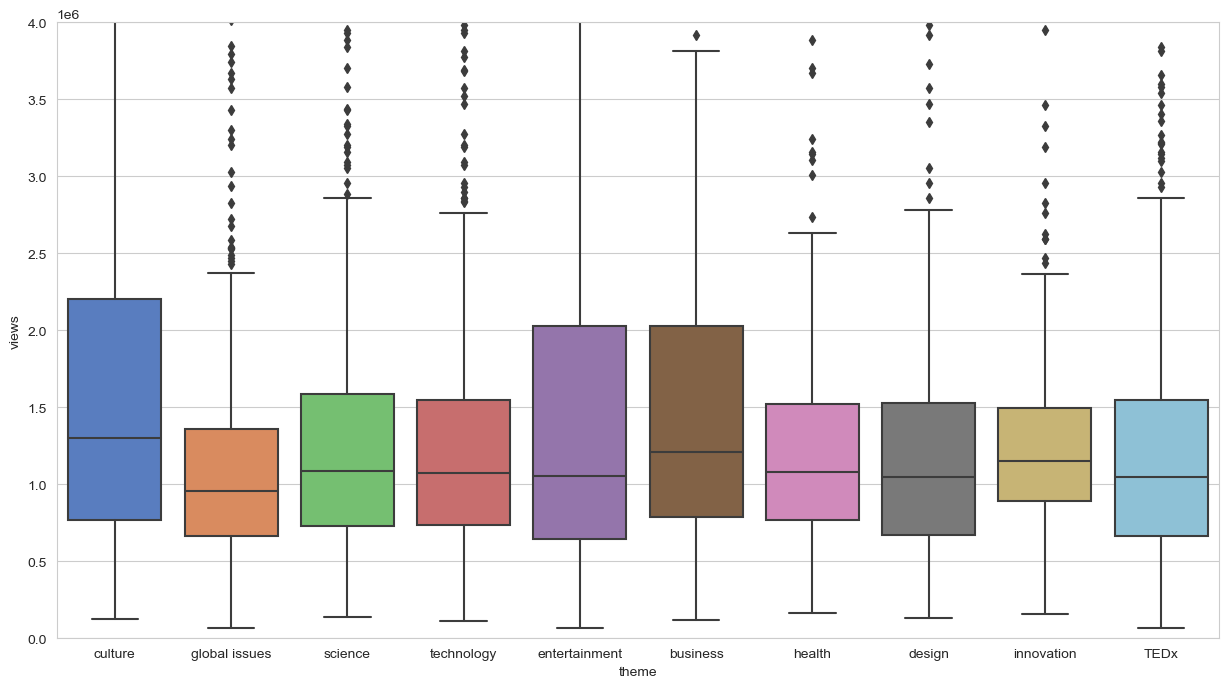

In [119]:
pop_theme_talks = theme_df[theme_df['theme'].isin(pop_themes.head(10)['theme'])] 
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8)) 
sns.boxplot(x='theme', y='views', data=pop_theme_talks, palette="muted", ax =ax) 
ax.set_ylim([0, 0.4e7])